# $$ Métodos de Integración Numérica $$

La integración​ numérica constituye una amplia gama de algoritmos para calcular el valor numérico de una integral definida y, por extensión, el término se usa a veces para describir algoritmos numéricos para resolver ecuaciones diferenciales.

El problema básico considerado por la integración numérica es calcular una solución aproximada a la integral definida:  $$ \int_{a}^{b}{f(x)dx} $$

Este problema también puede ser enunciado como un problema de valor inicial para una ecuación diferencial ordinaria, como sigue: $$ y'(x) = f(x),  y(a) = 0 $$

# **Métodos de Integración Numérica**

**Descripción del ejercicio:**

Dadas las siguientes integrales,

**C**. y = $$\int_{1}^{\pi}{\sqrt cos(x)^2 dx} $$

  **Paso 1: Definimos la función a integrar**

In [ ]:
import numpy as np

def f(x):
  return 1 / (x**2 + np.cos(x))

**Paso 2: Definimos los métodos para las diferentes funciones**
**Reglas simples:**  $$ I \approx = (b -a) \dfrac{\ f(a) + f(b)} {2} $$


**Simpson 1/3 simple:**  $$ I \approx = \dfrac{\ (b - a)} {6}[f(x_{0}) + 4f(x_{1})+f(x_{2})] $$

**Simpson 3/8 simple:**  $$ I \approx = \dfrac{\ (b - a)} {8}[f(x_{0}) + 3f(x_{1})+3f(x_{2})+ f(x_{3})] $$

**Reglas Compuestas:** $$ I \approx = \dfrac{\ h} {2}[f(x_{0}) + 2{\sum_{i=1}^{n-1}f(x_{i})} + f(x_{n})] $$

**Simpson 1/3 compuesta:** $$ I \approx = \dfrac{\ (b-a)} {3n}[f(x_{0}) + 4{\sum_{i=1,3,5,...}^{n-1}f(x_{i})} + 2{\sum_{i=2,4,6,...}^{n-2}f(x_{i})+ f(x_{n})}] $$

**Simpson 1/3 compuesta:** $$ I \approx = \dfrac{\ (3h)} {8}[f(x_{0})+3{\sum_{i=0}^{\dfrac{\ n}{3}-1}f(x_{3i+1})}+3{\sum_{i=0}^{\dfrac{\ n}{3}-1}f(x_{3i+2})+2{\sum_{i=0}^{\dfrac{\ n}{3}-2}f(x_{3i+3})+f(x_{n})}}] $$

**Cuadratura de Gauss (2 y 3 puntos)**  $$ I \approx = C_{0} F(x_{0})+C_{1} F(x_{1})+C_{2} F(x_{2})$$

donde F es f(x) elevada en $$x_{i} = \dfrac{\ (b+a)+(b-a)}{2}x_{di} $$ 

y $$ d_{x} = \dfrac{\ (b - a)}{2}dx_{d} $$

In [ ]:
# Trapecio Simple

def TrapecioSimple(a, b):
  return (b - a)*(f(a) + f(b)) / 2
def ErrorTrapecioSimple(IR, a, b):
  return (abs(IR - TrapecioSimple(a, b)) / IR) * 100

# Trapecio Compuesto
def TrapecioC(a, b, x):
  suma = 0 
  for i in range(1, n):
    suma = suma + 2 * f(x[i])
  return (b - a) / (2 * n) * (f(a) + suma + f(b))
def ErrorTrapecioC(IR, a, b, x):
  return (abs(IR - TrapecioC(a, b, x)) / IR) * 100

# Simpson 1/3 Simple

def Simpson13Simple(x):                                      # [x0 x1 x2]
  return (x[2] - x[0]) / 6 * (f(x[0]) + 4 * f(x[1]) + f(x[2]))
def ErrorSimpson13Simple(IR, x):
  return (abs(IR - Simpson13Simple(x)) / IR) * 100

# Simpson 1/3 Compuesto
def Simpson13C(a, b, x):
  suma = 0 
  for i in range(1, n, 2):
    suma = suma + 4 * f(x[i])
  for i in range(2, n-1, 2):
    suma = suma + 2 * f(x[i])
  return (b - a) / (3 * n) * (f(a) + suma + f(b))
def ErrorSimpson13C(IR, a, b, x):
  return (abs(IR - Simpson13C(a, b, x)) / IR) * 100


# Simpson 3/8 Simple

def Simpson38Simple(x):                                      # [x0 x1 x2]
  return (x[3] - x[0]) / 8 * (f(x[0]) + 3 * f(x[1]) + 3 * f(x[2]) + f(x[3]))
def ErrorSimpson38Simple(IR, x):
  return (abs(IR - Simpson38Simple(x)) / IR) * 100

# simpson 3/8 Compuesto

def Simpson38C(a, b, x):
  suma = 0 
  m = int(n / 3)
  for i in range(0, m):
    suma = suma + 3 * f(x[3 * i + 1]) + 3 * f(x[3 * i + 2])
  for i in range(0, m-1):
    suma = suma + 2 * f(x[3 * i +3])
  return (3 / 8)*((b - a) /  m) * (f(a) + suma + f(b))
def ErrorSimpson38C(IR, a, b, x):
  return (abs(IR - Simpson38C(a, b, x)) / IR) * 100



**Paso 3: Definimos las entradas** 

In [ ]:
a = 1
b = np.pi
IR = 0.648699

**Paso 4: Evaluamos las reglas Simples**

In [ ]:
# Trapecio Simple
print("La integral aproximada para la regla de Trapecio Simple es: ", TrapecioSimple(a, b), ";Error(%): ", ErrorTrapecioSimple(IR, a, b))

# Simpson 1/3 Simple
n = 2                                                  # número de segmentos
x = np.linspace(a, b, n+1)
print("La integral aproximada para la regla de Simpson 1/3 Simple es: ", Simpson13Simple(x), ";Error(%): ", ErrorSimpson13Simple(IR, x))

# Simpson 3/8 Simple
n = 3                                                  # número de segmentos
x = np.linspace(a, b, n+1)
print("La Integral apróximada para la regla de Simpson 3/8 Simple es: ", Simpson38Simple(x), "; Error(%): ", ErrorSimpson38Simple(IR, x))


La integral aproximada para la regla de Trapecio Simple es:  0.8159123269058809 ;Error(%):  25.77672031340897
La integral aproximada para la regla de Simpson 1/3 Simple es:  0.6468234781694601 ;Error(%):  0.28912050589564053
La Integral apróximada para la regla de Simpson 3/8 Simple es:  0.647641870120357 ; Error(%):  0.16296153988876427


**Paso 5: Evaluamos las reglas Compuestas**

In [ ]:
# Trapecio Compuesto
n = 18                                               # Número de segmentos
x = np.linspace(a, b, n+1)
print("La integral aproximada para la regla de Trapecio Compuesto es: ", TrapecioC(a, b, x), ";Error(%): ", ErrorTrapecioC(IR, a, b, x))

# Simpson 1/3 Compuesto
n = 18                                               # n es par, es dcir multiplo de 2
x = np.linspace(a, b, n+1)
print("La integral aproximada para la regla de Simpson 1/3 Compuesto es: ", Simpson13C(a, b, x), ";Error(%): ", ErrorSimpson13C(IR, a, b, x))

# Simpson 3/8 Compuesto
m = 18                                               # n debe ser multiplo de 3 
x = np.linspace(a, b, n+1)
print("La integral aproximada para la regla de Simpson 3/8 Compuesto es: ", Simpson38C(a, b, x), ";Error(%): ", ErrorSimpson38C(IR, a, b, x))

La integral aproximada para la regla de Trapecio Compuesto es:  0.6491819291511037 ;Error(%):  0.07444579860670449
La integral aproximada para la regla de Simpson 1/3 Compuesto es:  0.648698947651231 ;Error(%):  8.069808799812997e-06
La integral aproximada para la regla de Simpson 3/8 Compuesto es:  1.9460933581709632 ;Error(%):  199.9994385949359


**Paso 6: Cuadratura de Gauss**

In [ ]:
# Con dos puntos

xd_0 = -0.577350269
xd_1 = 0.577350269
C0 = 1
C1 = 1
dx = (b - a) / 2                           #dxd
x0= ((b + a) + (b - a) * xd_0) / 2
x1= ((b + a) + (b - a) * xd_1) / 2
F0 = f(x0) * dx
F1 = f(x1) * dx
ICG2 = C0 * F0 + C1 * F1

print("La integral aproximada por el método de cuadratura de Gauss con dos puntos es: ", ICG2, "; Error (%)", (abs(IR - ICG2) / IR) * 100)

# Con tres puntos

xd_0 = -0.774596669
xd_1 = 0
xd_2 = 0.774596669
C0 = 0.555555555
C1 = 0.888888888
C2 = 0.555555555
dx = (b - a) / 2                           #dxd
x0= ((b + a) + (b - a) * xd_0) / 2
x1= ((b + a) + (b - a) * xd_1) / 2
x2= ((b + a) + (b - a) * xd_2) / 2
F0 = f(x0) * dx
F1 = f(x1) * dx
F2 = f(x2) * dx

ICG3 = C0 * F0 + C1 * F1 + C2 * F2

print("La integral aproximada por el método de cuadratura de Gauss con tres puntos es: ", ICG3, "; Error (%)", (abs(IR - ICG3) / IR) * 100)


La integral aproximada por el método de cuadratura de Gauss con dos puntos es:  0.6497491457733844 ; Error (%) 0.16188490708084316
La integral aproximada por el método de cuadratura de Gauss con tres puntos es:  0.6489182838054446 ; Error (%) 0.033803629332642554


**Paso 7: Se tabulan los resultados**

In [ ]:
from tabulate import tabulate

Table =[["TrapecioSimple", TrapecioSimple[2],IR [0.648699], ErrorTrapecioSimple[25.77672031340897], ["TrapecioCompuesto", TrapecioC[18], IR[0.648699], ErrorTrapecioC[0.07444579860670449], ["Simpson13Simple", Simpson13Simple[2], IR[0.648699], ErrorSimpson13C[0.28912050589564053], ["Simpson38Simple", Simpson38Simple[3], IR[0.648699], ErrorSimpson38Simple[0.16296153988876427], ["Simpson13Compuesto", Simpson13C[18], IR[0.648699], ErrorSimpson13C[8.069808799812997], ["Simpson38Compuesto", Simpson38C[18], IR[0.648699], ErrorSimpson38C[199.9994385949359]]]]]]]]
print(tabulate(Table, headers=["Nombre del Método, Valor de n, Valor de Integral, Error(%)"]))

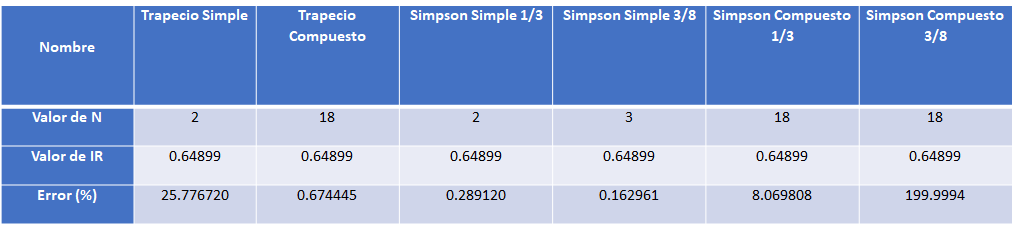

**Paso 8: Se analizan los resultados**

Teniendo en cuenta los resultados arrojados por la tabla y luego de realizar el desarrollo de la función por cada uno de los métodos de integración vistos tales como; Trapecio Simple, Trapecio Compuesto, Simpson Simple 1/3 y 3/8, y Simpson Compuesto 1/3 y 3/8; Se puede decir que el método mas efectivo para determinar el Error porcentual menor es el de Trapecio Compuesto conociendo el valosr de nuestra Integral Real que es de 0.64899, y cuando el valor de n, es multiplo de 3 y es par; si el numero no cumple esta condición no se podra realizar satisfactoriamente el método y nos arrojara un valor grande; Por otro lado no se trabaja el valor pedido en la guía de actividades ya que no nos muestra los valores que menos no acerca al Error mínimo

**Paso 9: Bibliografía**

* Canale, R. P. y P. Canale, R. (2007). Métodos numéricos para 
ingenieros (5a. ed.). México D.F, México: McGraw-Hill Interamericana. (pp. 619–639, 655–663). 